In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot

from tensorflow.keras.utils import to_categorical
import tensorflow.keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D, Bidirectional, ConvLSTM1D
from tensorflow.keras.layers import Input, TimeDistributed, Conv1D, MaxPooling1D, BatchNormalization, GlobalAveragePooling1D, Activation
from tensorflow.python.keras.utils import np_utils
from sklearn.metrics import precision_score, recall_score, f1_score

from typing import Any, Dict, List, Tuple
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns


def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values



# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y


# load the dataset, returns train and test X and y elements
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + 'C:/Users/user/Downloads/UCI HAR Dataset/')
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'C:/Users/user/Downloads/UCI HAR Dataset/')

    #zero-offset class values
    trainy = trainy - 1
    testy = testy - 1

    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)
    print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot

In [3]:
trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

(7352, 128, 9) (7352, 1) (7352, 6) (2947, 128, 9) (2947, 1) (2947, 6)


In [4]:
print("X train shape: ", trainX.shape)
print("Y train shape: ", trainy.shape)
print("Y train One hot shape: ", trainy_one_hot.shape)
print("X test shape: ", testX.shape)
print("Y test shape: ", testy.shape)
print("Y test One hot shape: ", testy_one_hot.shape)

X train shape:  (7352, 128, 9)
Y train shape:  (7352, 1)
Y train One hot shape:  (7352, 6)
X test shape:  (2947, 128, 9)
Y test shape:  (2947, 1)
Y test One hot shape:  (2947, 6)


In [5]:
print("0: Walking:" ,np.where(trainy == 0)[0].size)
print("1: WU:" ,np.where(trainy == 1)[0].size)
print("2: WD:" ,np.where(trainy == 2)[0].size)
print("3: Sitting:" ,np.where(trainy == 3)[0].size)
print("4: Standing:" ,np.where(trainy == 4)[0].size)
print("5: Laying:" ,np.where(trainy == 5)[0].size)

0: Walking: 1226
1: WU: 1073
2: WD: 986
3: Sitting: 1286
4: Standing: 1374
5: Laying: 1407


In [6]:
unique, counts = np.unique(trainy, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)

unique, counts = np.unique(testy, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)

Train data label statistics::
[[   0 1226]
 [   1 1073]
 [   2  986]
 [   3 1286]
 [   4 1374]
 [   5 1407]]
Test data label statistics::
[[  0 496]
 [  1 471]
 [  2 420]
 [  3 491]
 [  4 532]
 [  5 537]]


In [7]:
X_train_all = trainX   # at this stage, the data includes both dynamic and static HAR data
y_train_all = trainy

X_test_all = testX
y_test_all = testy

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train_one_hot,y_val_one_hot,y_train,y_val=train_test_split(trainX, trainy_one_hot, trainy,test_size=0.3,random_state=100)
 

In [9]:
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy_one_hot.shape[1]

In [ ]:
#BiLSTM1

In [10]:
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(Bidirectional(LSTM(128, input_shape=(n_timesteps, n_features))))
model.add(Dropout(0.5))

model.add(Dense(units = 64, activation='relu'))
# Softmax layer
model.add(Dense(n_outputs, activation = 'softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, n_timesteps,n_features))
model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 256)            │       141,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,150 (617.77 KB)

 Trainable params: 158,150 (617.77 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)
     

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.3830 - loss: 1.4670 - val_accuracy: 0.6274 - val_loss: 0.9191
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.6572 - loss: 0.8280 - val_accuracy: 0.7584 - val_loss: 0.5961
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.7728 - loss: 0.5489 - val_accuracy: 0.7874 - val_loss: 0.5506
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.7763 - loss: 0.5640 - val_accuracy: 0.8246 - val_loss: 0.4545
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.8363 - loss: 0.4356 - val_accuracy: 0.7625 - val_loss: 0.5626
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.7816 - loss: 0.5139 - val_accuracy: 0.8200 - val_loss: 0.4595
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.8512 - loss: 0.3884 - val_accuracy: 0.8699 - val_loss: 0.3227
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.8828 - loss: 0.3091 - val_accuracy: 0.9161 - 

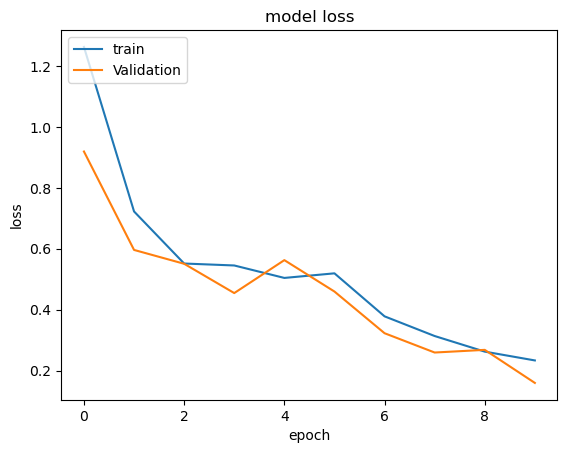

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

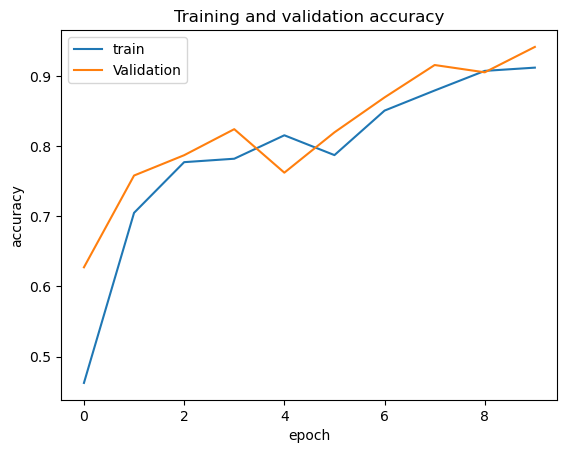

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
[[443  28  20   0   5   0]
 [ 46 403  21   0   1   0]
 [  2   9 409   0   0   0]
 [  0   1   0 382 108   0]
 [  1   1   0  95 435   0]
 [  0   0   0   0   0 537]]
0.8853070919579233
0.8850270229003463
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       496
           1       0.91      0.86      0.88       471
           2       0.91      0.97      0.94       420
           3       0.80      0.78      0.79       491
           4       0.79      0.82      0.80       532
           5       1.00      1.00      1.00       537

    accuracy                           0.89      2947
   macro avg       0.89      0.89      0.89      2947
weighted avg       0.89      0.89      0.89      2947



<Axes: >

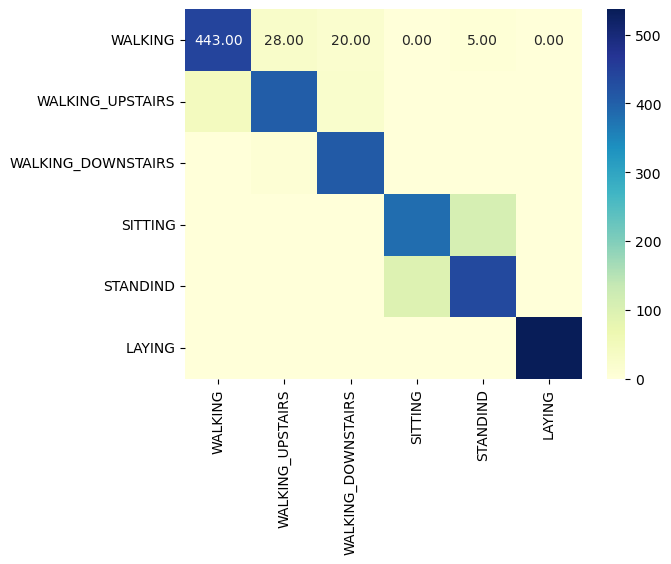

In [14]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS', 'SITTING','STANDIND','LAYING']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [ ]:
#BiLSTM2

In [15]:
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences = True, input_shape=(n_timesteps, n_features))))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(128, input_shape=(n_timesteps, n_features))))
model.add(Dropout(0.5))

model.add(Dense(units = 64, activation='relu'))
# Softmax layer
model.add(Dense(n_outputs, activation = 'softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, n_timesteps,n_features))
model.summary()
     

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (None, 128, 256)       │       141,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 256)            │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 552,390 (2.11 MB)

 Trainable params: 552,390 (2.11 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)
     

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 313ms/step - accuracy: 0.4454 - loss: 1.3102 - val_accuracy: 0.6809 - val_loss: 0.7584
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 331ms/step - accuracy: 0.6912 - loss: 0.7217 - val_accuracy: 0.7779 - val_loss: 0.5114
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 339ms/step - accuracy: 0.7169 - loss: 0.7361 - val_accuracy: 0.8395 - val_loss: 0.4174
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 344ms/step - accuracy: 0.8579 - loss: 0.3898 - val_accuracy: 0.8957 - val_loss: 0.2937
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 344ms/step - accuracy: 0.8858 - loss: 0.2983 - val_accuracy: 0.7720 - val_loss: 0.6005
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 350ms/step - accuracy: 0.8779 - loss: 0.3184 - val_accuracy: 0.9411 - val_loss: 0.1635
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 357ms/step - accuracy: 0.9268 - loss: 0.1952 - val_accuracy: 0.9316 - val_loss: 0.1828
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 360ms/step - accuracy: 0.9303 - loss: 0.1813 - val_accu

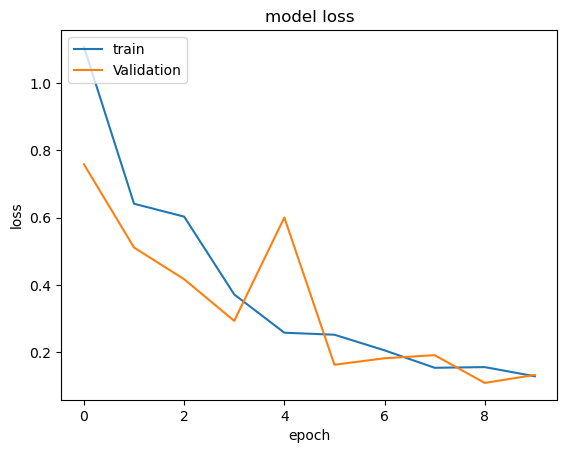

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

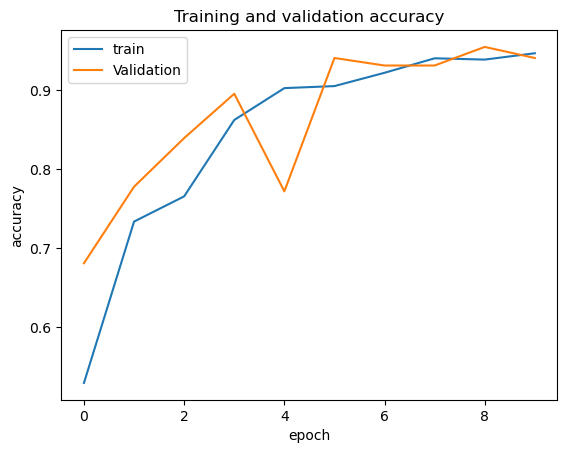

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step
[[434  31  31   0   0   0]
 [  1 447  23   0   0   0]
 [  1  54 365   0   0   0]
 [  1   8   0 370 112   0]
 [  2   1   0  51 478   0]
 [  0  27   0   0   0 510]]
0.8836104513064132
0.8842900783892491
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       496
           1       0.79      0.95      0.86       471
           2       0.87      0.87      0.87       420
           3       0.88      0.75      0.81       491
           4       0.81      0.90      0.85       532
           5       1.00      0.95      0.97       537

    accuracy                           0.88      2947
   macro avg       0.89      0.88      0.88      2947
weighted avg       0.89      0.88      0.88      2947



<Axes: >

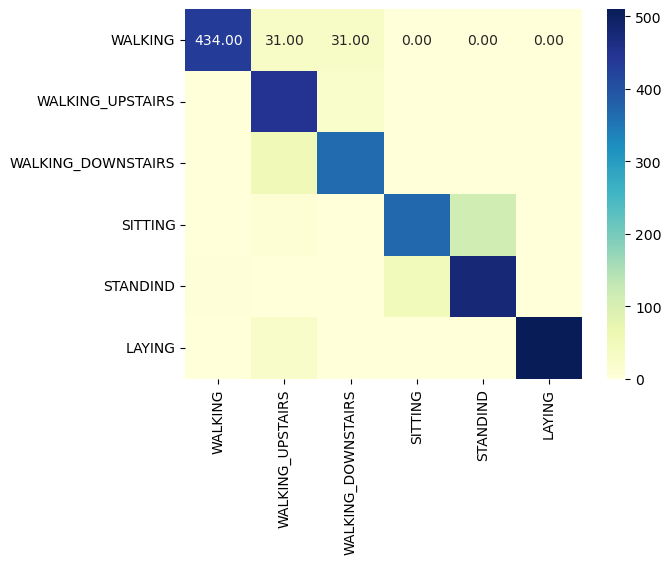

In [19]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS', 'SITTING','STANDIND','LAYING']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [ ]:
#BiLSTM3

In [20]:
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences = True, input_shape=(n_timesteps, n_features))))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(128, return_sequences = True, input_shape=(n_timesteps, n_features))))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(128, input_shape=(n_timesteps, n_features))))
model.add(Dropout(0.5))

model.add(Dense(units = 64, activation='relu'))
# Softmax layer
model.add(Dense(n_outputs, activation = 'softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, n_timesteps,n_features))
model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional) │ (None, 128, 256)       │       141,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 128, 256)       │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 256)            │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 946,630 (3.61 MB)

 Trainable params: 946,630 (3.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)
     

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 44s 686ms/step - accuracy: 0.4692 - loss: 1.2534 - val_accuracy: 0.7403 - val_loss: 0.6339
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 38s 649ms/step - accuracy: 0.7775 - loss: 0.5580 - val_accuracy: 0.8640 - val_loss: 0.3638
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 40s 684ms/step - accuracy: 0.8564 - loss: 0.3869 - val_accuracy: 0.9170 - val_loss: 0.2405
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 705ms/step - accuracy: 0.8889 - loss: 0.2999 - val_accuracy: 0.9506 - val_loss: 0.1335
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 42s 728ms/step - accuracy: 0.9387 - loss: 0.1508 - val_accuracy: 0.9451 - val_loss: 0.1226
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 43s 740ms/step - accuracy: 0.9516 - loss: 0.1242 - val_accuracy: 0.9597 - val_loss: 0.1089
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 44s 756ms/step - accuracy: 0.9536 - loss: 0.1138 - val_accuracy: 0.9533 - val_loss: 0.1207
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 44s 763ms/step - accuracy: 0.9453 - loss: 0.1225 - val_accu

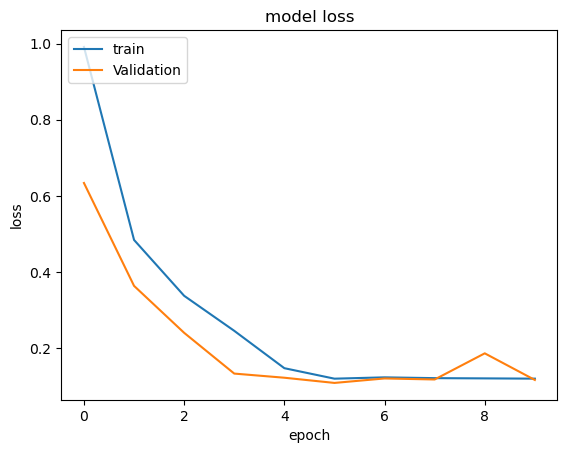

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

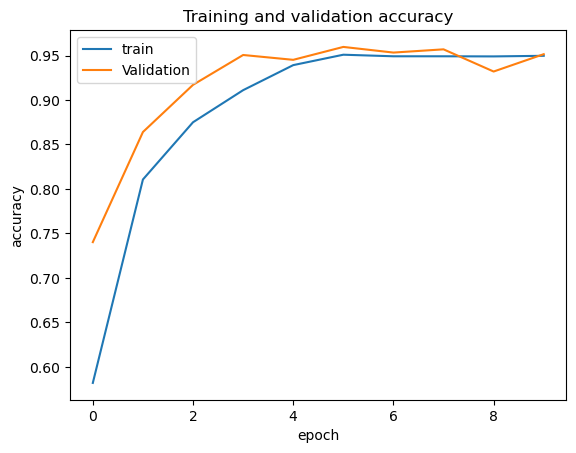

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
     

93/93 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step
[[466   3  27   0   0   0]
 [ 30 415  26   0   0   0]
 [  1   0 419   0   0   0]
 [  0  19   0 368  99   5]
 [  1   2   0  52 477   0]
 [  0  27   0   0   0 510]]
0.9009161859518154
0.8999845983909943
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       496
           1       0.89      0.88      0.89       471
           2       0.89      1.00      0.94       420
           3       0.88      0.75      0.81       491
           4       0.83      0.90      0.86       532
           5       0.99      0.95      0.97       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947



<Axes: >

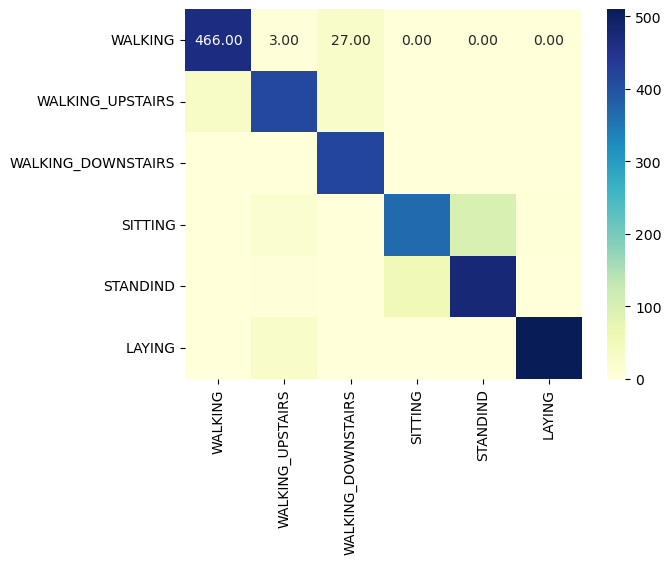

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS', 'SITTING','STANDIND','LAYING']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [ ]:
#BiLSTM4

In [25]:
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences = True, input_shape=(n_timesteps, n_features))))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(128, return_sequences = True, input_shape=(n_timesteps, n_features))))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(128, return_sequences = True, input_shape=(n_timesteps, n_features))))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(128, input_shape=(n_timesteps, n_features))))
model.add(Dropout(0.5))

model.add(Dense(units = 64, activation='relu'))
# Softmax layer
model.add(Dense(n_outputs, activation = 'softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, n_timesteps,n_features))
model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional) │ (None, 128, 256)       │       141,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 128, 256)       │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 128, 256)       │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 256)            │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,340,870 (5.12 MB)

 Trainable params: 1,340,870 (5.12 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)
   

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4820 - loss: 1.2463 - val_accuracy: 0.6999 - val_loss: 0.7541
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.6941 - loss: 0.7103 - val_accuracy: 0.7797 - val_loss: 0.4972
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.8102 - loss: 0.4517 - val_accuracy: 0.8305 - val_loss: 0.4077
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8535 - loss: 0.3711 - val_accuracy: 0.8935 - val_loss: 0.2917
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9026 - loss: 0.2629 - val_accuracy: 0.9302 - val_loss: 0.2004
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9340 - loss: 0.1785 - val_accuracy: 0.9510 - val_loss: 0.1324
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9384 - loss: 0.1614 - val_accuracy: 0.9257 - val_loss: 0.1915
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9465 - loss: 0.1391 - val_accuracy: 0.9538 - val_loss:

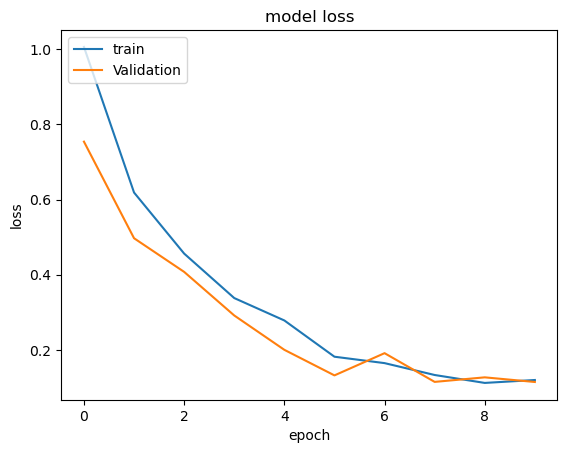

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

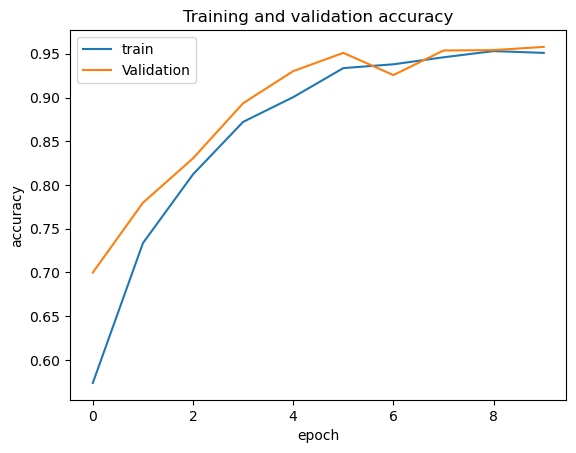

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step
[[456   3  37   0   0   0]
 [ 13 433  24   0   1   0]
 [  0   0 420   0   0   0]
 [  0  19   1 388  77   6]
 [  0   1   0  80 451   0]
 [  0  18   0   0   0 519]]
0.9049881235154394
0.9046351923587572
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       496
           1       0.91      0.92      0.92       471
           2       0.87      1.00      0.93       420
           3       0.83      0.79      0.81       491
           4       0.85      0.85      0.85       532
           5       0.99      0.97      0.98       537

    accuracy                           0.90      2947
   macro avg       0.90      0.91      0.90      2947
weighted avg       0.91      0.90      0.90      2947



<Axes: >

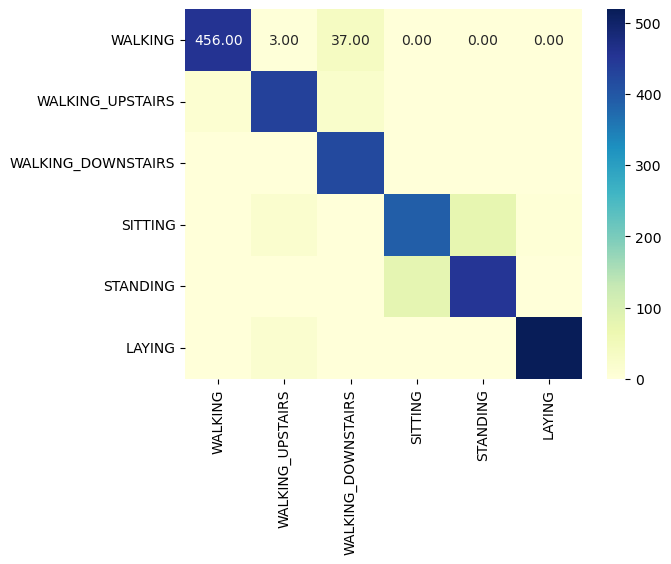

In [30]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS', 'SITTING','STANDING','LAYING']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')
     